In [ ]:
## Toevoegen: Als je alle centroids en clusters bewaard kan ik op het einde daar over loopen 
## en ze toch allemaal plotten met sleep(.2) clear_output(wait=True)

In [16]:
import numpy as np
import scipy.stats as st
from scipy.spatial import distance
import math
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import sys
from matplotlib.animation import FuncAnimation
from time import sleep
from IPython.display import clear_output

In [17]:
# laad en split data
data = np.loadtxt('test_clustering.txt')
X = data[:,0:2]
Y = data[:,2]
n = 7

In [18]:
def k_means(X,n):
    # plaats random centroids
    centroids = st.uniform.rvs(X.min(axis=0), X.max(axis=0) - X.min(axis=0), size=(n, X.shape[1]), random_state = 1)

    change = 1
    # terwijl de verbetering groter is dan een miljoenste
    while change > 1e-6:
        distances = np.zeros([len(X),n])

        # bereken alle afstanden tot punten (verassend snel)
        for i, centroid in enumerate(centroids):
            for j,dataPoint in enumerate(X):
                distances[j,i] = math.sqrt((dataPoint[0]-centroid[0])**2+(dataPoint[1]-centroid[1])**2)

        # geef aan welke centroid het dichtsbij ligt
        clusters = np.argmin(distances,axis = 1)

        # bereken voor elk cluster het nieuwe gemiddelde
        newCentroids = np.zeros([centroids.shape[0],centroids.shape[1]])
        for i in range(len(centroids)):
            newCentroids[i,0] = np.mean(X[np.where(clusters == i)][:,0])
            newCentroids[i,1] = np.mean(X[np.where(clusters == i)][:,1])

        # bereken de verandering en update centroids
        change = sum(sum(np.subtract(centroids,newCentroids))**2)
        centroids = newCentroids
        
        sleep(.2)
        clear_output(wait=True)
        plt.scatter(X[:,0], X[:,1], c = clusters)
        plt.scatter(centroids[:,0],centroids[:,1], c = 'black', alpha = 1)
        
    return(centroids, clusters)

[[21.28723404 22.99893617]
 [ 7.36858974  7.75705128]
 [20.92561983  6.83305785]
 [14.9165493   7.39647887]
 [33.14278846  8.79375   ]
 [32.69453125 22.13789063]
 [ 9.29464286 22.95267857]]


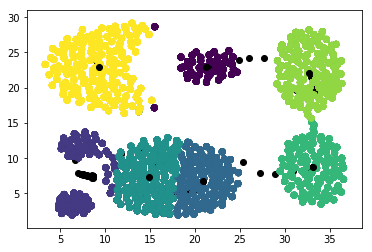

In [19]:
centroids, clusters = k_means(X,n)
print(centroids)